In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

X_raw=df.drop(['Region','Channel'],axis=1)
X_norm=MinMaxScaler().fit_transform(X_raw)
X_Transformed=StandardScaler().fit_transform(X_raw)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_raw)

X_trans_norm=MinMaxScaler().fit_transform(StandardScaler().fit_transform(X_raw))
X_tn_pca=pca.fit_transform(X_trans_norm)

processed_data = {
    'Raw': X_raw,
    'Normalized': X_norm,
    'Transformed': X_Transformed,
    'PCA': X_pca,
    'T+N': X_trans_norm,
    'T+N+PCA': X_tn_pca
}


In [5]:
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluation Function
def evaluate(X, labels):
    return {
        'Silhouette': silhouette_score(X, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X, labels),
        'Davies-Bouldin': davies_bouldin_score(X, labels)
    }

res = []
clust_range = [3, 4, 5]

for name, x in processed_data.items():
    print(f"\nProcessing preprocessing: {name}")

    for c in clust_range:
        try:
            kmeans = KMeans(n_clusters=c, random_state=42).fit(x)
            metrics = evaluate(x, kmeans.labels_)
            res.append(['KMeans', name, c, *metrics.values()])
        except Exception as e:
            print(f"KMeans failed on {name}, c={c}: {e}")

        try:
            agg = AgglomerativeClustering(n_clusters=c).fit(x)
            metrics = evaluate(x, agg.labels_)
            res.append(['Hierarchical', name, c, *metrics.values()])
        except Exception as e:
            print(f"Hierarchical failed on {name}, c={c}: {e}")

    try:
        meanshift = MeanShift().fit(x)
        metrics = evaluate(x, meanshift.labels_)
        res.append(['MeanShift', name, 'Auto', *metrics.values()])
    except Exception as e:
        print(f"MeanShift failed on {name}: {e}")



Processing preprocessing: Raw

Processing preprocessing: Normalized

Processing preprocessing: Transformed

Processing preprocessing: PCA

Processing preprocessing: T+N

Processing preprocessing: T+N+PCA


In [6]:
print(f"Total Results Collected: {len(res)}")
print(res[:5])


Total Results Collected: 42
[['KMeans', 'Raw', 3, np.float64(0.46302676343469656), np.float64(203.7995189947743), np.float64(0.8905499629009616)], ['Hierarchical', 'Raw', 3, np.float64(0.37501552145375117), np.float64(183.35966728564645), np.float64(0.9782550571802849)], ['KMeans', 'Raw', 4, np.float64(0.33450718819345243), np.float64(192.14359598431705), np.float64(0.9850702846040976)], ['Hierarchical', 'Raw', 4, np.float64(0.3482693295945641), np.float64(185.25591673198107), np.float64(0.9700745164311327)], ['KMeans', 'Raw', 5, np.float64(0.3763283247810499), np.float64(212.23817388145494), np.float64(0.923018569935115)]]


In [7]:
res_df = pd.DataFrame(res, columns=['Algorithm', 'Preprocessing', 'Clusters',
                                             'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
res_df.sort_values(by='Silhouette', ascending=False).reset_index(drop=True)


,Algorithm,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,Hierarchical,PCA,3,0.525279,245.348634,0.732413
1,KMeans,PCA,3,0.524468,285.457020,0.748392
2,KMeans,T+N+PCA,4,0.509600,372.848266,0.689000
3,Hierarchical,T+N+PCA,3,0.504542,267.851692,0.762261
4,MeanShift,T+N+PCA,Auto,0.496927,93.883253,0.441081
5,MeanShift,PCA,Auto,0.489697,100.665341,0.486109
6,KMeans,T+N+PCA,3,0.484389,278.769549,0.796496
7,KMeans,T+N+PCA,5,0.467298,393.405243,0.680170
8,KMeans,Raw,3,0.463027,203.799519,0.890550
9,KMeans,PCA,4,0.462357,307.071864,0.729601


<ipython-input-8-9cca785a6cdb>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Silhouette', y='Algorithm', hue='Preprocessing', data=sorted_res_df, ci=None)


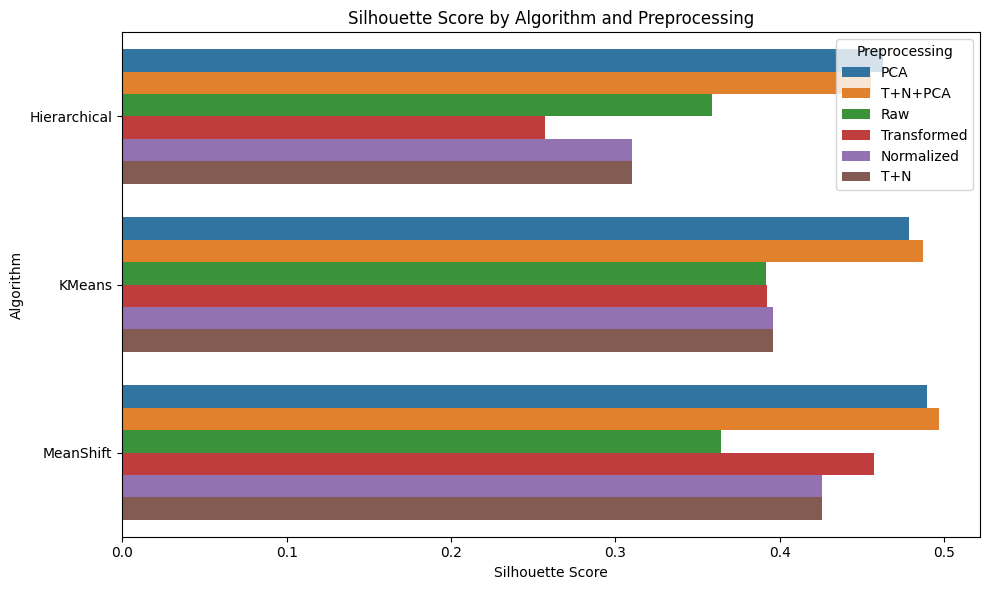

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_res_df = res_df.sort_values(by='Silhouette', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Silhouette', y='Algorithm', hue='Preprocessing', data=sorted_res_df, ci=None)
plt.title('Silhouette Score by Algorithm and Preprocessing')
plt.xlabel('Silhouette Score')
plt.ylabel('Algorithm')
plt.legend(title='Preprocessing', loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-10-a6cc2458095f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Silhouette', y='Preprocessing', data=algo_df, ax=axes[i, 0], ci=None)
<ipython-input-10-a6cc2458095f>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Calinski-Harabasz', y='Preprocessing', data=algo_df, ax=axes[i, 1], ci=None)
<ipython-input-10-a6cc2458095f>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Davies-Bouldin', y='Preprocessing', data=algo_df, ax=axes[i, 2], ci=None)
<ipython-input-10-a6cc2458095f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Silhouette', y='Preprocessing', data=algo_df, ax=axes[i, 0], ci=None)
<ipython-input-10-a6cc2458095f>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effec

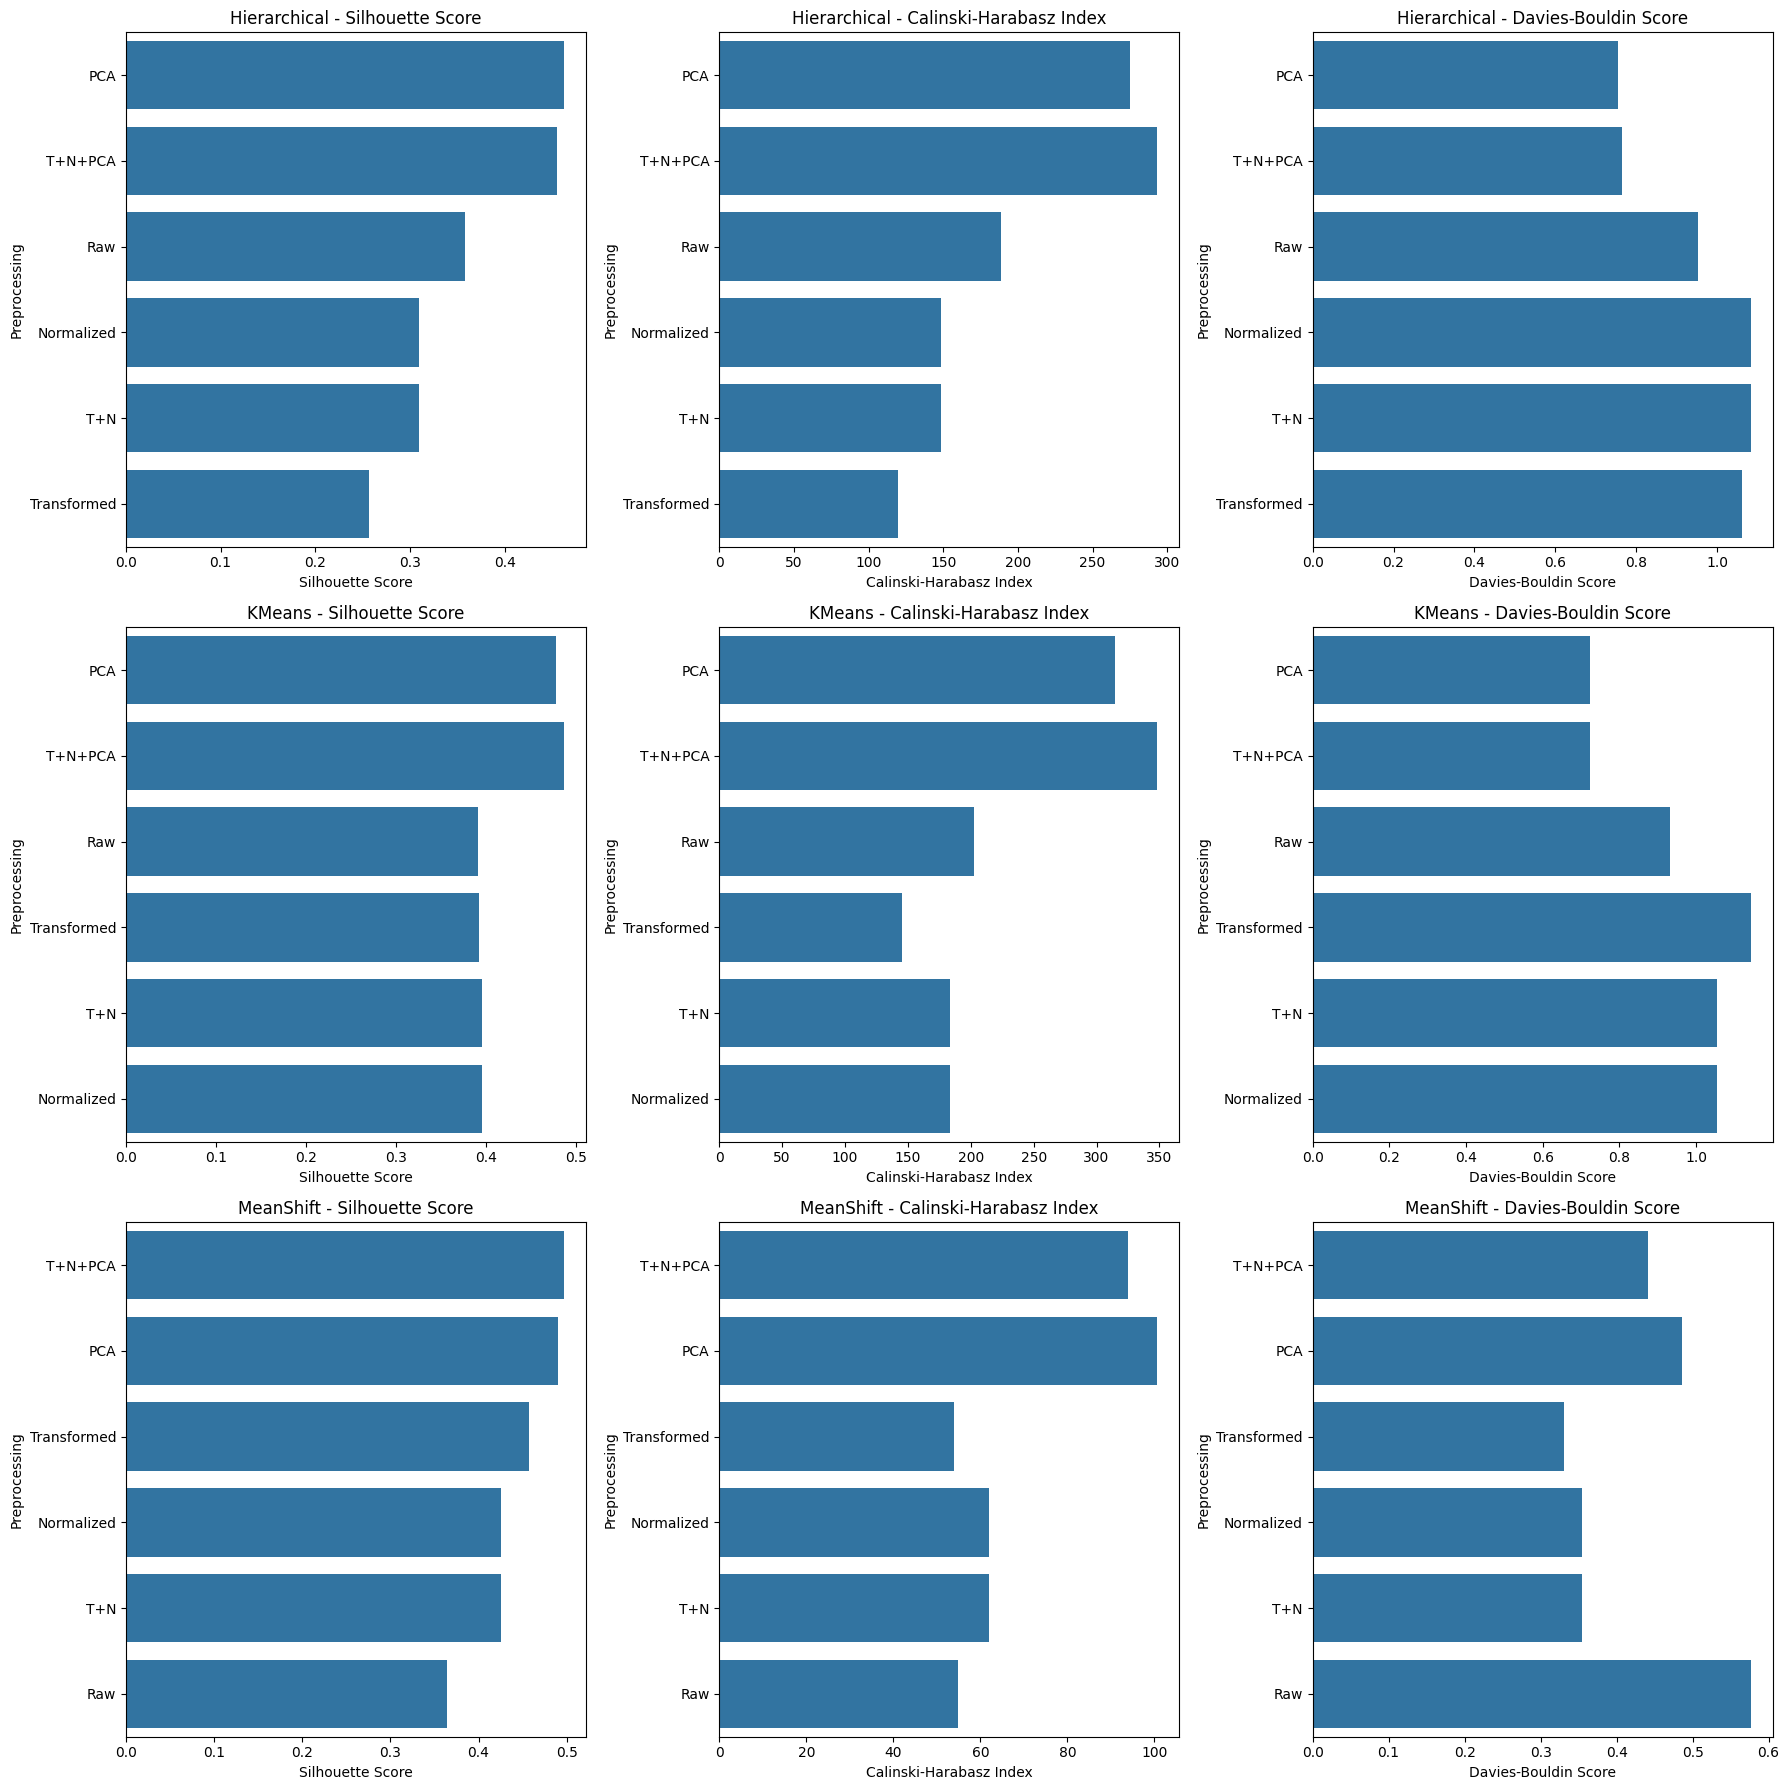

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_res_df = res_df.sort_values(by='Silhouette', ascending=False).reset_index(drop=True)

algorithms = sorted_res_df['Algorithm'].unique()

fig, axes = plt.subplots(len(algorithms), 3, figsize=(18, 6 * len(algorithms)))

for i, algorithm in enumerate(algorithms):
    algo_df = sorted_res_df[sorted_res_df['Algorithm'] == algorithm]

    # Silhouette Score plot
    sns.barplot(x='Silhouette', y='Preprocessing', data=algo_df, ax=axes[i, 0], ci=None)
    axes[i, 0].set_title(f'{algorithm} - Silhouette Score')
    axes[i, 0].set_xlabel('Silhouette Score')
    axes[i, 0].set_ylabel('Preprocessing')

    # Calinski-Harabasz Index plot
    sns.barplot(x='Calinski-Harabasz', y='Preprocessing', data=algo_df, ax=axes[i, 1], ci=None)
    axes[i, 1].set_title(f'{algorithm} - Calinski-Harabasz Index')
    axes[i, 1].set_xlabel('Calinski-Harabasz Index')
    axes[i, 1].set_ylabel('Preprocessing')

    # Davies-Bouldin Score plot
    sns.barplot(x='Davies-Bouldin', y='Preprocessing', data=algo_df, ax=axes[i, 2], ci=None)
    axes[i, 2].set_title(f'{algorithm} - Davies-Bouldin Score')
    axes[i, 2].set_xlabel('Davies-Bouldin Score')
    axes[i, 2].set_ylabel('Preprocessing')

plt.tight_layout()
plt.show()


This analysis compared the performance of KMeans, MeanShift, and Agglomerative Clustering on the Wholesale Customers dataset using various preprocessing techniques.
